## カントリーマアムの価格分析
- 原料価格からカントリーマアムの原価を計算
- 現在のカントリーマアムの単価と比較する．

## やったこと
  - 価格分析の原料の選定
    - 小麦，カカオ，植物油脂に着目
    <br><https://www.fujiya-peko.co.jp/sweets/item/17085.html>
    - 原料費データベース
    <br><https://www.worldbank.org/en/research/commodity-markets#2>
    - カントリーマアム数量・重さ
    <br><https://shrinkflation.info/index.php?%E3%82%AB%E3%83%B3%E3%83%88%E3%83%AA%E3%83%BC%E3%83%9E%E3%82%A2%E3%83%A0>
  - レファレンスから得たcsvを連結して分析 

In [22]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 5.2MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=89f6210c258ce8761254311af002321d54cf95027e0099e13c1d536578c1e1db
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#World Bank Commodity Price Data からデータを取得
df=pd.read_csv("CMOHistoricalDataAnnual.csv")
df.head()

Year  CRUDE_PETRO CRUDE_BRENT  CRUDE_DUBAI  ...    Zinc   GOLD PLATINUM  SILVER
0  1960         1.63          ..         1.63  ...  246.19  35.27    83.50    0.91
1  1961         1.57          ..         1.57  ...  214.31  35.25    83.50    0.92
2  1962         1.52          ..         1.52  ...  185.93  35.23    83.50    1.08
3  1963         1.50          ..         1.50  ...  211.51  35.09    80.93    1.28
4  1964         1.45          ..         1.45  ...  326.49  35.10    88.48    1.29

[5 rows x 70 columns]

# 新しいセクション

In [4]:
df=df[45:]
df.reset_index(inplace=True, drop=True)
df.head()

Year  CRUDE_PETRO CRUDE_BRENT  ...    GOLD PLATINUM SILVER
0  2005        53.39       54.43  ...  444.84   896.53   7.31
1  2006        64.29       65.39  ...  604.34  1140.78  11.56
2  2007        71.12        72.7  ...  696.72  1304.94  13.39
3  2008        96.99       97.64  ...  871.71  1574.50  15.00
4  2009        61.76       61.86  ...  972.97  1203.40  14.64

[5 rows x 70 columns]

In [5]:
#炭水化物内の砂糖と小麦の比率を出す
portion_sugar=0.25
portion_wheat=0.75
#カントリーマアムの成分表から脂質，砂糖，小麦の重量/gを出す．
m_oil=2.2
m_sugar=6.4*portion_sugar
m_wheat=6.4*portion_wheat
#COCOA($/kg), Wheat, US HRW($/mt),PALM_OIL($/mt), Sugar, world($/kg)
dollar=100 #円/$
k_cocoa=dollar/pow(10,3) #円/g
k_wheat=dollar/pow(10,6) #円/g
k_palmoil=dollar/pow(10,6) #円/g
k_sugar=dollar/pow(10,3) #円/g

#小麦，チョコとパーム油と砂糖の価格/gの列を，2005年以降で取り出す．
df["COCOA"]=df["COCOA"]*k_cocoa
df["WHEAT_US_HRW"]=df["WHEAT_US_HRW"]*k_wheat
df["PALM_OIL"]=df["PALM_OIL"]*k_palmoil
df["SUGAR_WLD"]=df["SUGAR_WLD"]*k_sugar

df_extract=pd.concat([df["Year"],df["COCOA"],df["WHEAT_US_HRW"],df["PALM_OIL"],df["SUGAR_WLD"]],axis=1)
df_extract.head()

Year  COCOA  WHEAT_US_HRW  PALM_OIL  SUGAR_WLD
0  2005  0.154      0.015235  0.045056      0.022
1  2006  0.159      0.019204  0.050830      0.033
2  2007  0.195      0.025521  0.081669      0.022
3  2008  0.258      0.032603  0.104292      0.028
4  2009  0.289      0.022407  0.074115      0.040

In [6]:
#カントリーマアム1枚当たりの原価を出す
df_price_maam=pd.DataFrame(df["WHEAT_US_HRW"]*m_wheat+df["PALM_OIL"]*m_oil+df["SUGAR_WLD"]*m_sugar,columns=["COUNTRY_MAAM_PRICE"])
df_price_maam.reset_index(inplace=True, drop=True)

In [7]:
#手打ちで作成したカントリーマアムの売値を読みだす．
df2=pd.read_csv("countrymaam.csv")
df_eachprice=df2["price"]
#原料価格，原料価格から推定したカントリーマアムの価格，手打ちの売値を結合
#データがすべてそろう2005年から
df3=pd.concat([df_extract,df_price_maam,df_eachprice],axis=1)
df3

Year  COCOA  WHEAT_US_HRW  ...  SUGAR_WLD  COUNTRY_MAAM_PRICE      price
0   2005  0.154      0.015235  ...      0.022            0.207451  10.766667
1   2006  0.159      0.019204  ...      0.033            0.256805  10.766667
2   2007  0.195      0.025521  ...      0.022            0.337373  11.535714
3   2008  0.258      0.032603  ...      0.028            0.430737  13.458333
4   2009  0.289      0.022407  ...      0.040            0.334607  13.458333
5   2010  0.313      0.022358  ...      0.047            0.387783  13.458333
6   2011  0.298      0.031626  ...      0.057            0.505546  14.681818
7   2012  0.239      0.031324  ...      0.047            0.455103  14.681818
8   2013  0.244      0.031225  ...      0.039            0.403841  14.681818
9   2014  0.306      0.028489  ...      0.037            0.380191  16.150000
10  2015  0.314      0.020445  ...      0.030            0.292082  16.150000
11  2016  0.289      0.016663  ...      0.040            0.305836  16.150000
12  2017  0.203      0.017420  ...      0.035            0.304814  16.150000
13  2018  0.229      0.020993  ...      0.028            0.286072  16.150000
14  2019  0.234      0.020169  ...      0.028            0.273965  16.150000
15  2020  0.237      0.021201  ...      0.028            0.312407  16.150000

[16 rows x 7 columns]

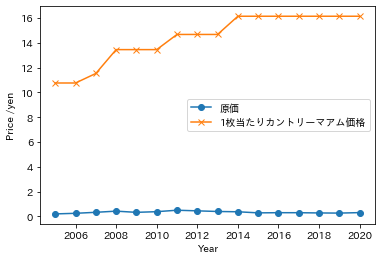

In [24]:
import japanize_matplotlib
plt.plot(df3["Year"], df3["COUNTRY_MAAM_PRICE"], marker = 'o',label = '原価')
plt.plot(df3["Year"], df3["price"], marker = 'x',label = '1枚当たりカントリーマアム価格')
plt.xlabel("Year")
plt.ylabel("Price /yen")
plt.legend()

- 原料費が異常に安い．日本への輸入に際して上乗せになる費用（船賃など）が含まれていない．
- 価格のオーダーを合わせるために農水省の輸入小麦政府売り渡し価格を調べた．
- 令和2年10月で約49000円/t＝0.049円/g
  - 同時期の小麦国際価格の約2.5倍
- 砂糖の価格は190円/kg=0.19円/g
  - 同時期の砂糖国際価格の約1.5倍
- パーム油の国際価格と輸入価格の差はわからなかったので，2倍と仮に設定．

In [8]:
df["WHEAT_JPN"]=df["WHEAT_US_HRW"]*2.5
df["PALM_OIL_JPN"]=df["PALM_OIL"]*2
df["SUGAR_JPN"]=df["SUGAR_WLD"]*1.5

#カントリーマアム1枚当たりの原価を出す
df_price_maam_r=pd.DataFrame(df["WHEAT_JPN"]*m_wheat+df["PALM_OIL_JPN"]*m_oil+df["SUGAR_JPN"]*m_sugar,columns=["COUNTRY_MAAM_PRICE_mod"])
df_price_maam_r.reset_index(inplace=True, drop=True)

df4=pd.concat([df_extract,df_price_maam_r,df_eachprice],axis=1)
df4

Year  COCOA  WHEAT_US_HRW  ...  SUGAR_WLD  COUNTRY_MAAM_PRICE_mod      price
0   2005  0.154      0.015235  ...      0.022                0.433866  10.766667
1   2006  0.159      0.019204  ...      0.033                0.533300  10.766667
2   2007  0.195      0.025521  ...      0.022                0.718396  11.535714
3   2008  0.258      0.032603  ...      0.028                0.917321  13.458333
4   2009  0.289      0.022407  ...      0.040                0.690990  13.458333
5   2010  0.313      0.022358  ...      0.047                0.791625  13.458333
6   2011  0.298      0.031626  ...      0.057                1.041395  14.681818
7   2012  0.239      0.031324  ...      0.047                0.947784  14.681818
8   2013  0.244      0.031225  ...      0.039                0.851421  14.681818
9   2014  0.306      0.028489  ...      0.037                0.799155  16.150000
10  2015  0.314      0.020445  ...      0.030                0.609232  16.150000
11  2016  0.289      0.016663  ...      0.040                0.619664  16.150000
12  2017  0.203      0.017420  ...      0.035                0.623436  16.150000
13  2018  0.229      0.020993  ...      0.028                0.600126  16.150000
14  2019  0.234      0.020169  ...      0.028                0.573936  16.150000
15  2020  0.237      0.021201  ...      0.028                0.653297  16.150000

[16 rows x 7 columns]

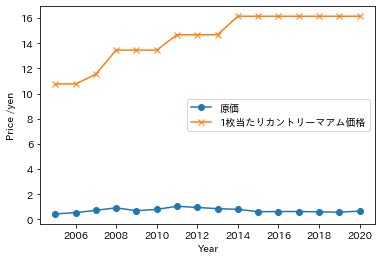

In [25]:
plt.plot(df4["Year"], df4["COUNTRY_MAAM_PRICE_mod"], marker = 'o',label = '原価')
plt.plot(df4["Year"], df4["price"], marker = 'x',label = '1枚当たりカントリーマアム価格')
plt.xlabel("Year")
plt.ylabel("Price /yen")
plt.legend()

### 価格補正してわかったこと
- 価格に占める原料費の割合は数%(1円)程度．
- 原料費が倍になっても数%程度の影響しかない．
- 原料高騰は50%近い値上げの根拠とはなり得ない．
<br>

### ほかのコストの影響
- 人件費や工程コスト，販管費
  - この15年で人件費は増加傾向？
  - 工程コストは大規模な新規設備投資は不要なはずで変わらないはず．
  - 販管費も減っているのでは？CM見なくなったし．